In [1]:
"""
Copyright 2021 Huawei Technologies Co., Ltd

CREATED:  2020-6-04 20:12:13
MODIFIED: 2021-11-01 01:48:45
"""

# -*- coding:utf-8 -*-
import cv2
import time

from PIL import Image, ImageDraw
from acl_model import Model

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][0:]

In [4]:
device_id = 0
model_path = "model/yolov5s_aipp.om"

In [5]:
model = Model(device_id, model_path)

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 1
input  0
model input dims ({'name': 'images', 'dimCount': 4, 'dims': [1, 640, 640, 3]}, 0)
model input datatype 4
model output size 3
output  0
model output dims ({'name': 'Transpose_271:0', 'dimCount': 5, 'dims': [1, 3, 80, 80, 85]}, 0)
model output datatype 1
output  1
model output dims ({'name': 'Transpose_287:0', 'dimCount': 5, 'dims': [1, 3, 40, 40, 85]}, 0)
model output datatype 1
output  2
model output dims ({'name': 'Transpose_303:0', 'dimCount': 5, 'dims': [1, 3, 20, 20, 85]}, 0)
model output datatype 1
[Model] class Model init resource stage success


In [8]:
img_path = "data/person.jpg"
img_org_bgr = cv2.imread(img_path)

In [9]:
%timeit -n 10 -r 3 
bboxes = model.run1(img_org_bgr)

[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success
inference takes 0.009623289108276367
moving data takes 0.002107381820678711
detect takes 0.024703025817871094
nms takes 0.0010330677032470703
the rest takes 0.0002551078796386719


In [10]:
img = Image.open(img_path)

In [11]:
img1 = ImageDraw.Draw(img)
for bbox in bboxes:
    img1.rectangle(list(bbox[:4]), outline ="red", width=2)
    print(bbox[:4], bbox[4], bbox[5], coco_labels[int(bbox[5])])

[190.0, 96.0, 274.0, 378.0] 0.92381 0 person
[64.0, 265.0, 206.0, 349.0] 0.9060187 16 dog
[405.0, 138.0, 600.0, 352.0] 0.88476676 17 horse


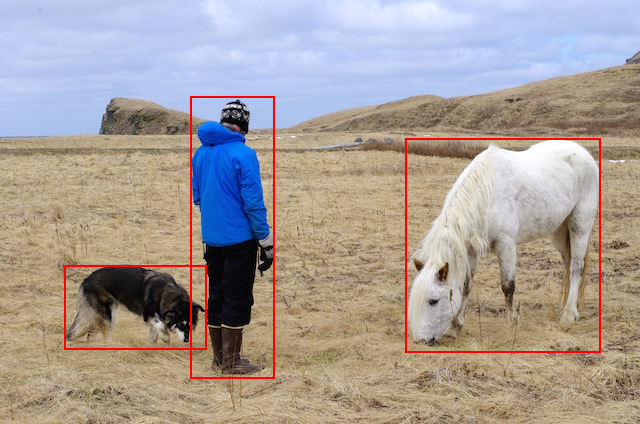

In [12]:
img